## 5) Object Counting
### Moving objects captured by fixed cameras are the focus of several computer vision applications.

In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
from skimage import measure

####A) Write a function that performs pixel-by-pixel frame differencing using, as reference frame, the first frame of an image sequence. Apply a classification threshold and save the results.

In [ ]:
#https://medium.com/swlh/image-processing-with-python-image-differencing-for-video-feeds-ee071519e7d2
#https://debuggercafe.com/moving-object-detection-using-frame-differencing-with-opencv/
#https://pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/
#https://datacarpentry.org/image-processing/07-thresholding/
#https://stackoverflow.com/questions/189943/how-can-i-quantify-difference-between-two-images

In [ ]:
#getting frames from the video
vid = cv2.VideoCapture('DatasetC.mpg')
success,image = vid.read()
count = 000
while success:
    cv2.imwrite("%d_frame.jpg" % count, image)
    success,image = vid.read()
    count += 1

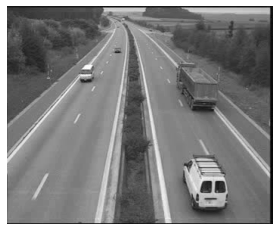

In [ ]:
#reading in the reference image (first frame of the video)
referenceImg = cv2.imread("0_frame.jpg")
referenceImg = referenceImg[:,:,::-1]
referenceImg = np.dot(referenceImg[...,:3], [0.3, 0.59, 0.11]) 
plt.axis('off')
plt.imshow(referenceImg, cmap='gray')

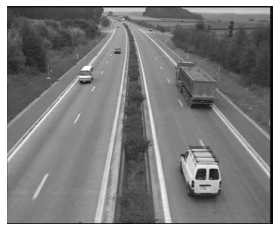

In [ ]:
#reading in the next frame to compare
nextFrame = cv2.imread("1_frame.jpg")
nextFrame = nextFrame[:,:,::-1]
nextFrame = np.dot(nextFrame[...,:3], [0.3, 0.59, 0.11]) 
plt.axis('off')
plt.imshow(nextFrame, cmap='gray')

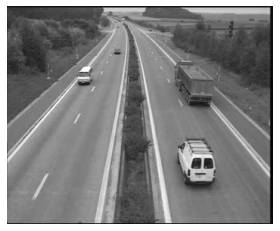

In [ ]:
#reading in the next frame to compare
nextFrame2 = cv2.imread("2_frame.jpg")
nextFrame2 = nextFrame2[:,:,::-1]
nextFrame2 = np.dot(nextFrame2[...,:3], [0.3, 0.59, 0.11]) 
plt.axis('off')
plt.imshow(nextFrame2, cmap='gray')

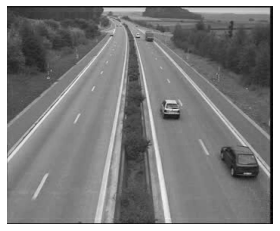

In [ ]:
#reading in the next frame to compare
nextFrame100 = cv2.imread("100_frame.jpg")
nextFrame100 = nextFrame100[:,:,::-1]
nextFrame100 = np.dot(nextFrame100[...,:3], [0.3, 0.59, 0.11]) 
plt.axis('off')
plt.imshow(nextFrame100, cmap='gray')

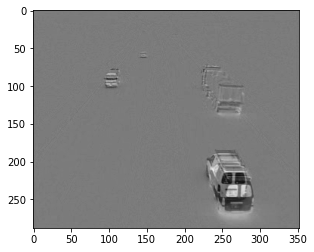

In [ ]:
#taking nextFrame away from the referenceImg to get the absolte difference between the images

#cv2_imshow(abs(referenceImg) - abs(nextFrame))
#plt.imshow(abs(referenceImg) - abs(nextFrame), cmap='gray')
plt.imshow((abs(nextFrame) - abs(referenceImg)), cmap='gray')

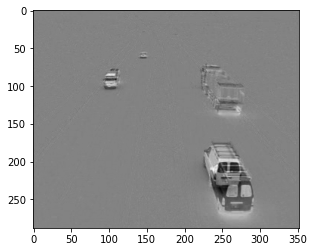

In [ ]:
plt.imshow((abs(nextFrame2) - abs(referenceImg)), cmap='gray')

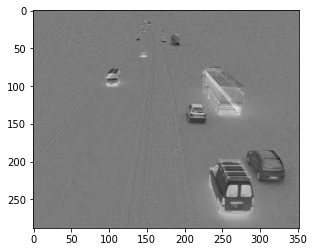

In [ ]:
plt.imshow((abs(nextFrame100) - abs(referenceImg)), cmap='gray')

In [ ]:
print(min(referenceImg.flatten()))
print(min(nextFrame.flatten()))

(min(nextFrame.flatten())) - (min(referenceImg.flatten()))

1.18
0.8899999999999999


-0.29000000000000004

In [ ]:
print(min(referenceImg.flatten()))
print(min(nextFrame2.flatten()))

(min(nextFrame2.flatten())) - (min(referenceImg.flatten()))

1.18
1.77


0.5900000000000001

In [ ]:
diffImg = abs(nextFrame) - abs(referenceImg)
(min(diffImg.flatten())) - (min(referenceImg.flatten()))

-212.52999999999997

In [ ]:
diffImg.sum()

-18794.64000000001

In [ ]:
diffImg = abs(nextFrame2) - abs(referenceImg)
(min(diffImg.flatten())) - (min(referenceImg.flatten()))

-216.45000000000002

In [ ]:
diffImg = abs(nextFrame100) - abs(referenceImg)
(min(diffImg.flatten())) - (min(referenceImg.flatten()))

-184.32999999999998

In [ ]:
#whilst the same image being fed in is unlikely, it still casts an observation on images where there is little to no change
diffImg = abs(nextFrame) - abs(referenceImg)
diffImg.sum()

-18794.64000000001

In [ ]:
diffImg = abs(nextFrame2) - abs(referenceImg)
diffImg.sum()

-14721.200000000024

In [ ]:
diffImg = abs(nextFrame100) - abs(referenceImg)
diffImg.sum()

-160794.63000000006

In [ ]:
diffImg = abs(referenceImg) - abs(referenceImg)
diffImg.sum()

0.0

In [ ]:
#if the sum of the values in the difference image =0, there has been no change/no image is detected
#if the sum of the values in the difference image =! 0, there has been a change/an image is detected
#however, this means there is always change, even if an object isnt detected due to maybe grainy ness

In [ ]:
#creating the function to compare an input frame to the reference frame
def ICV_imgDifference(frame):
  reference = referenceImg
  differenceImage = abs(frame) - abs(reference)
  return differenceImage

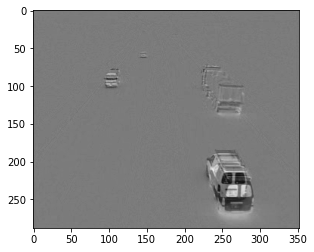

In [ ]:
plt.imshow(ICV_imgDifference(nextFrame), cmap='gray')

In [ ]:
diff = ICV_imgDifference(nextFrame)

In [ ]:
#classifying object movement detetcion based on a threshold

threshold = -100
if (min(diff.flatten())) - (min(referenceImg.flatten())) < threshold:
  print("Object movement detected")
else:
  print("No object movement detected")

Object movement detected


#### B) Repeat the exercise using the previous frame as reference frame (use frame It-1 as reference frame for frame It, for each t). Comment the results in the report.

In [ ]:
def ICV_imgDifference2(currentFrame, nextFrame):
  differenceImage = (abs(nextFrame) - abs(currentFrame))
  return differenceImage

In [ ]:
a = ICV_imgDifference2(nextFrame, nextFrame2)
x = min(a.flatten())
y = min(referenceImg.flatten())
x-y

-204.13000000000002

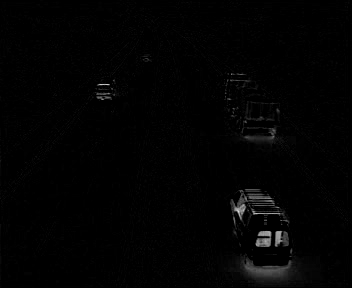

Frame 0 - Object movement detected


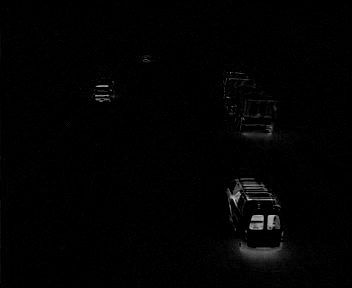

Frame 1 - Object movement detected


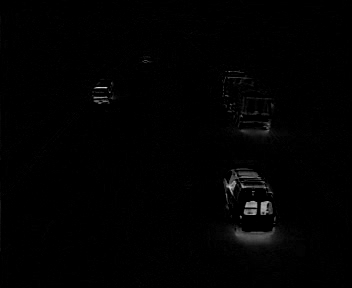

Frame 2 - Object movement detected


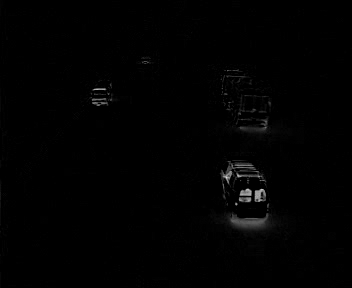

Frame 3 - Object movement detected


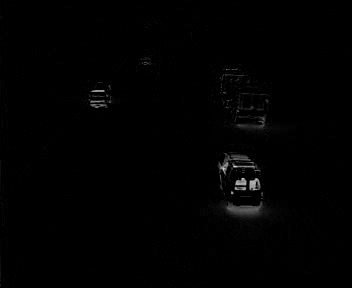

Frame 4 - Object movement detected


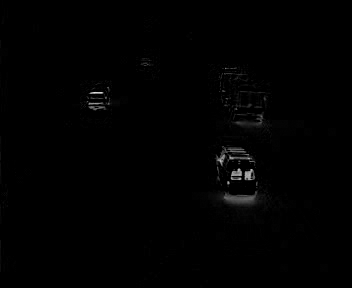

Frame 5 - Object movement detected


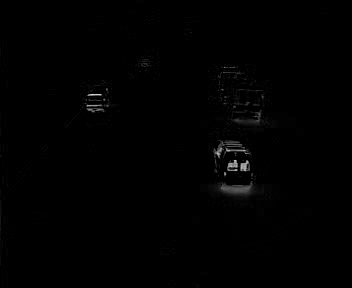

Frame 6 - Object movement detected


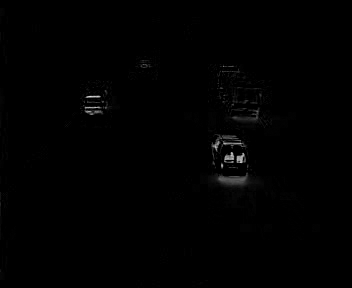

Frame 7 - Object movement detected


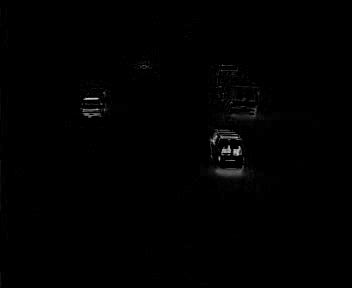

Frame 8 - Object movement detected


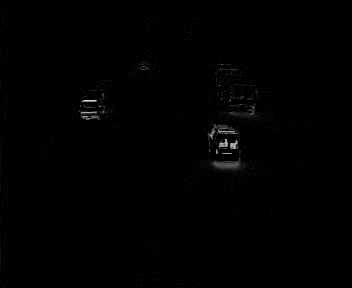

Frame 9 - Object movement detected


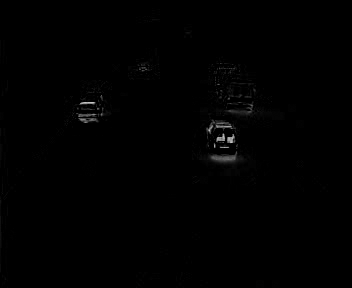

Frame 10 - Object movement detected


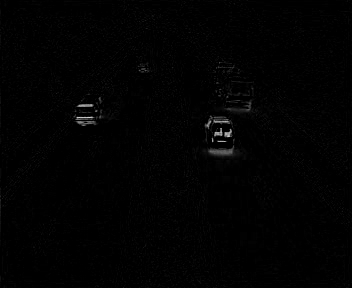

Frame 11 - Object movement detected


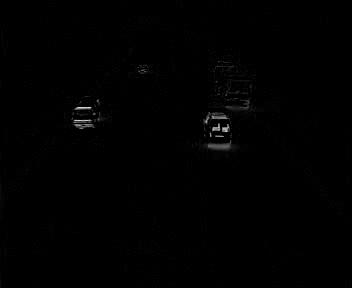

Frame 12 - Object movement detected


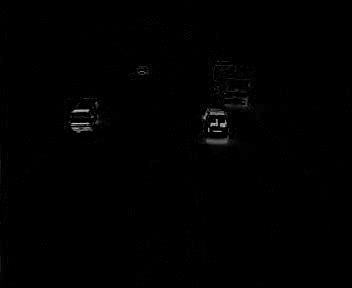

Frame 13 - Object movement detected


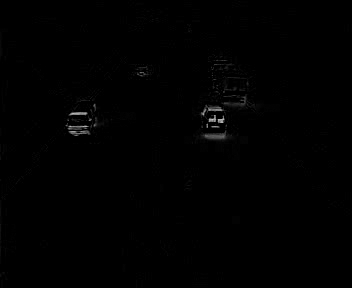

Frame 14 - Object movement detected


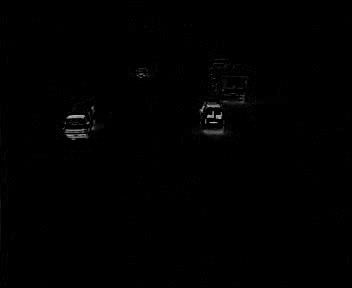

Frame 15 - Object movement detected


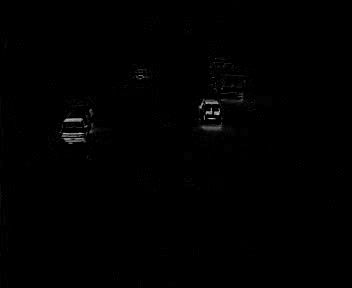

Frame 16 - Object movement detected


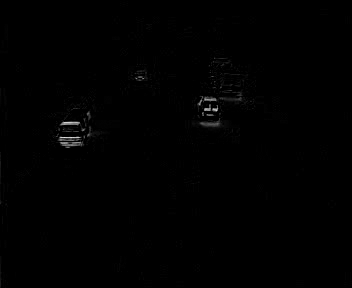

Frame 17 - Object movement detected


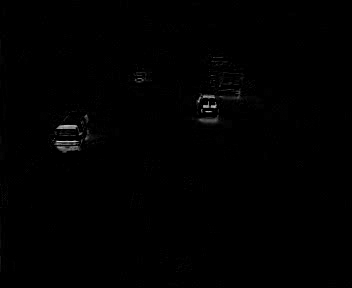

Frame 18 - Object movement detected


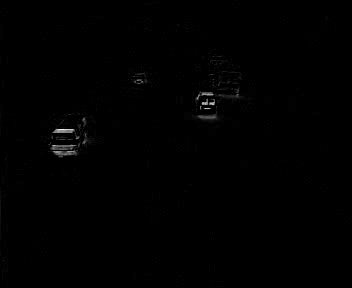

Frame 19 - Object movement detected


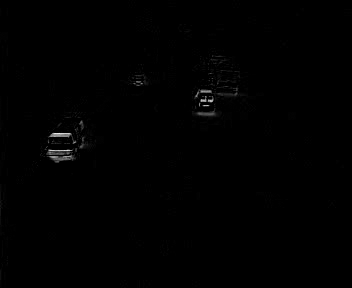

Frame 20 - Object movement detected


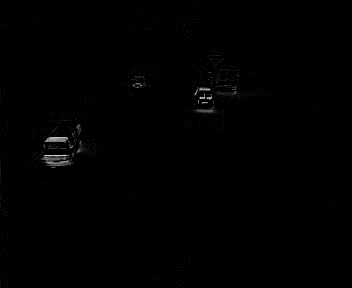

Frame 21 - Object movement detected


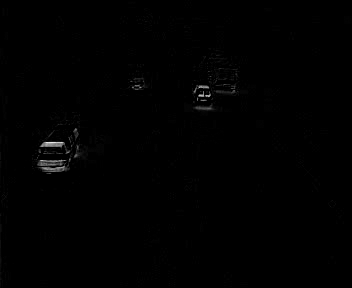

Frame 22 - Object movement detected


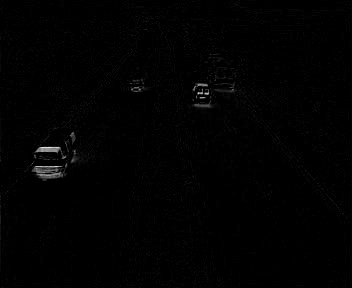

Frame 23 - Object movement detected


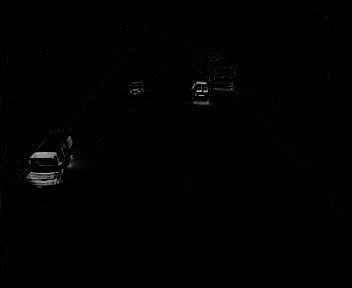

Frame 24 - Object movement detected


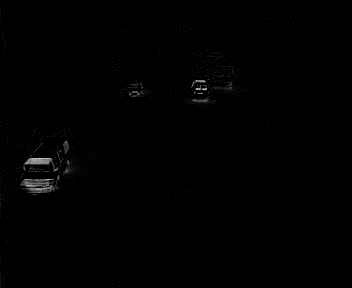

Frame 25 - Object movement detected


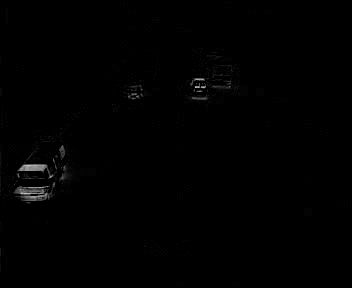

Frame 26 - Object movement detected


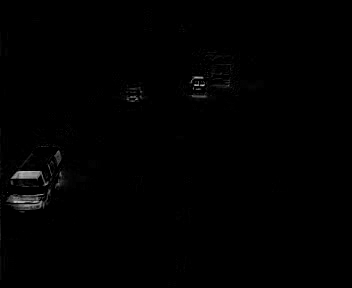

Frame 27 - Object movement detected


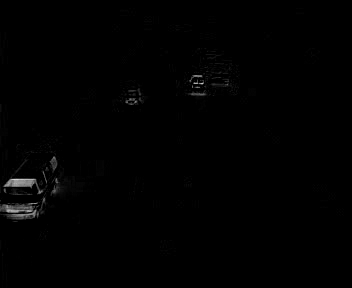

Frame 28 - Object movement detected


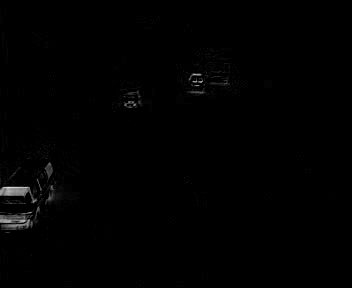

Frame 29 - Object movement detected


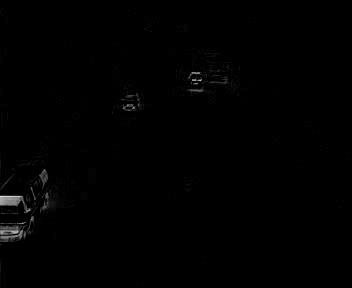

Frame 30 - Object movement detected


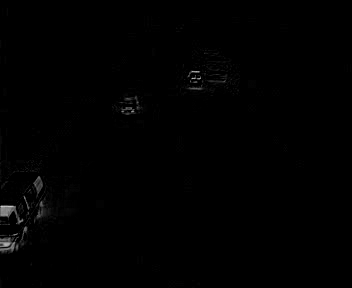

Frame 31 - Object movement detected


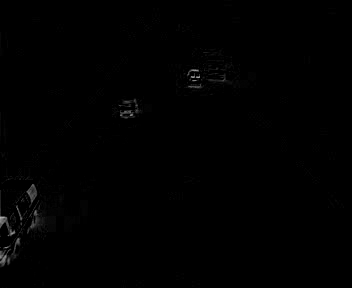

Frame 32 - Object movement detected


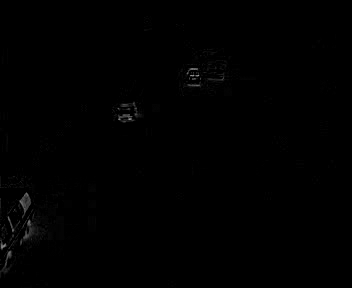

Frame 33 - Object movement detected


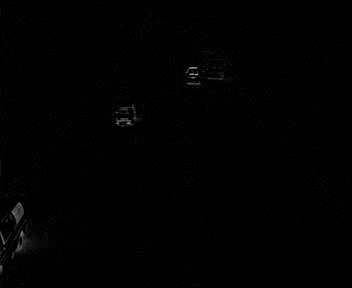

Frame 34 - Object movement detected


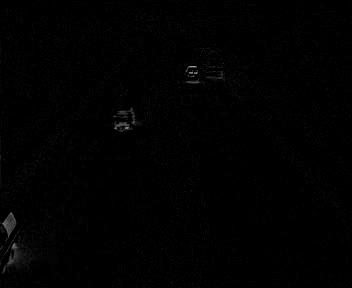

Frame 35 - Object movement detected


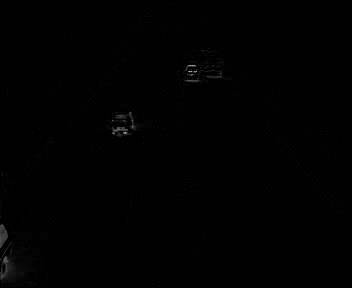

Frame 36 - Object movement detected


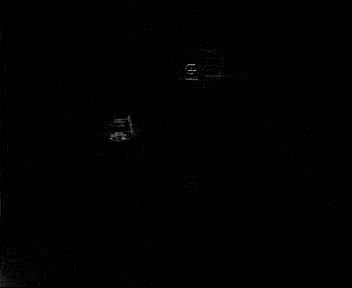

Frame 37 - Object movement detected


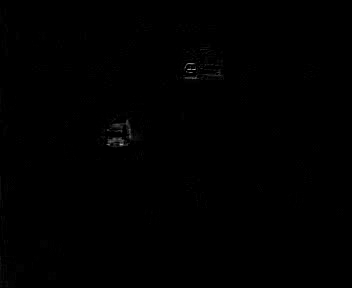

Frame 38 - Object movement detected


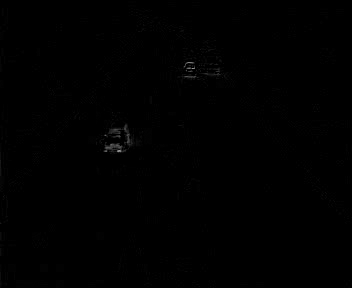

Frame 39 - Object movement detected


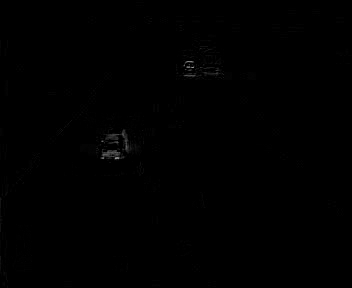

Frame 40 - Object movement detected


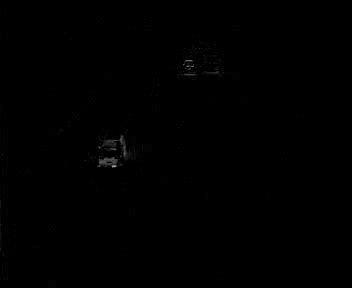

Frame 41 - Object movement detected


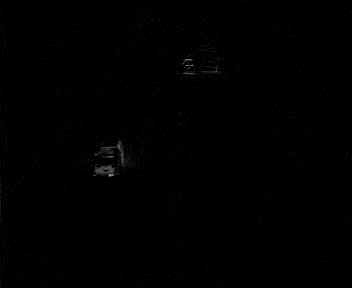

Frame 42 - Object movement detected


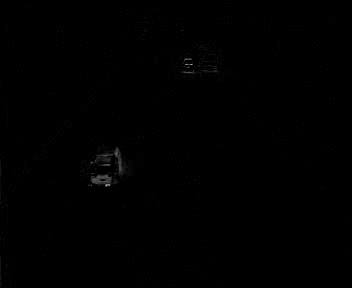

Frame 43 - Object movement detected


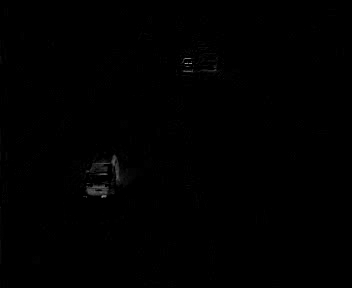

Frame 44 - Object movement detected


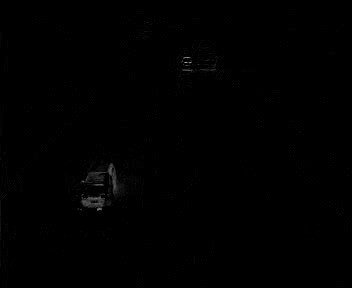

Frame 45 - Object movement detected


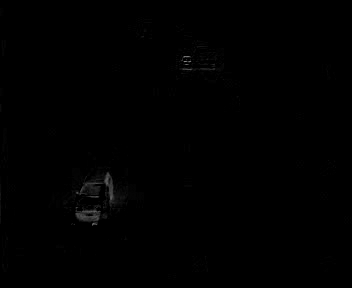

Frame 46 - Object movement detected


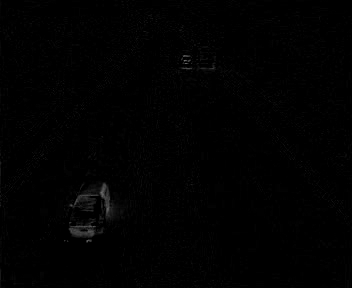

Frame 47 - Object movement detected


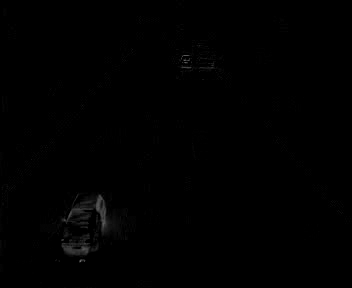

Frame 48 - Object movement detected


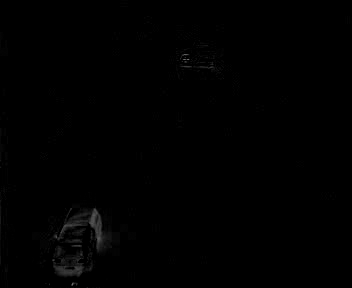

Frame 49 - Object movement detected


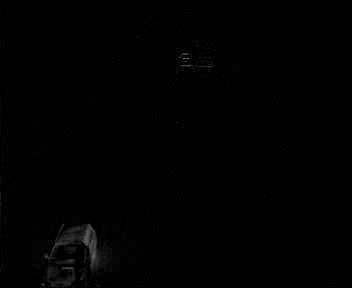

Frame 50 - Object movement detected


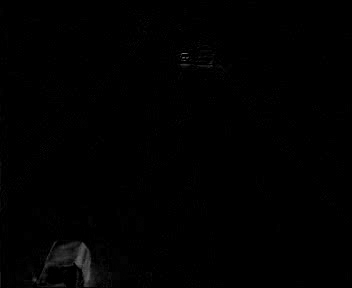

Frame 51 - Object movement detected


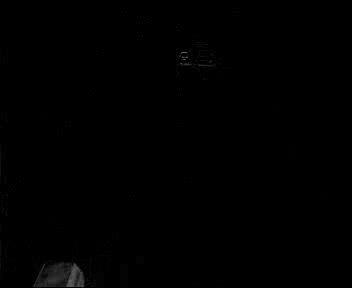

Frame 52 - Object movement detected


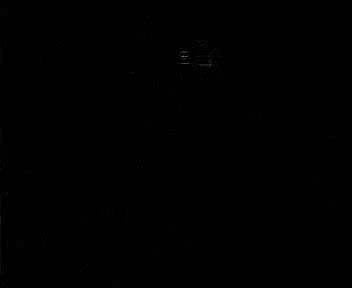

Frame 53 - Object movement detected


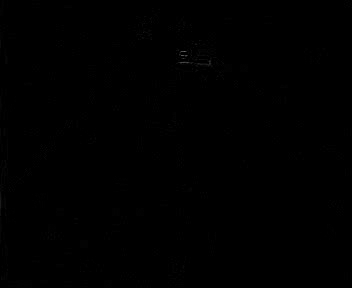

Frame 54 - No object movement detected


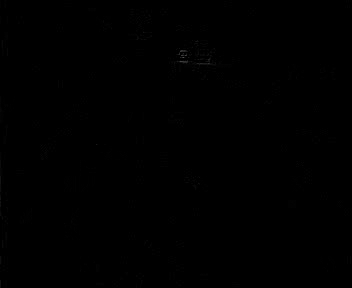

Frame 55 - Object movement detected


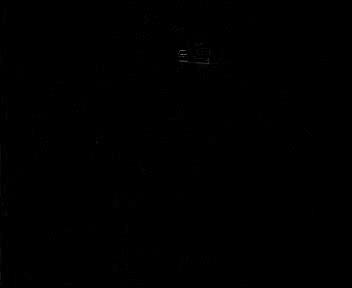

Frame 56 - Object movement detected


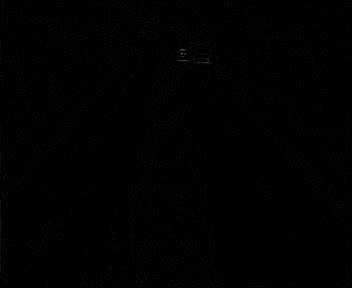

Frame 57 - Object movement detected


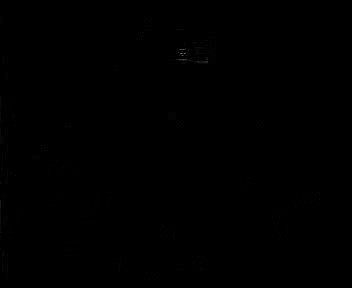

Frame 58 - Object movement detected


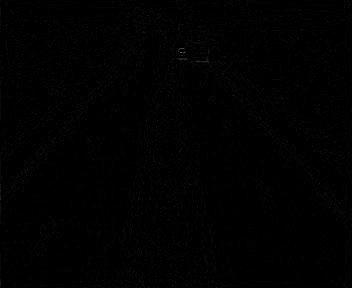

Frame 59 - Object movement detected


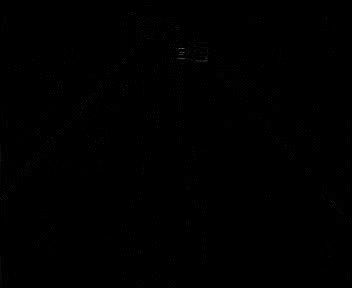

Frame 60 - No object movement detected


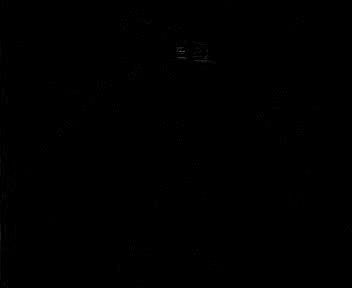

Frame 61 - Object movement detected


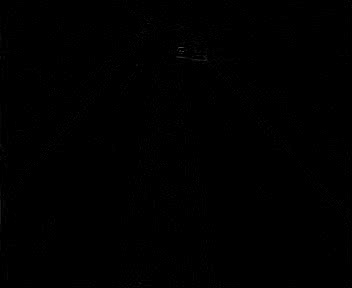

Frame 62 - No object movement detected


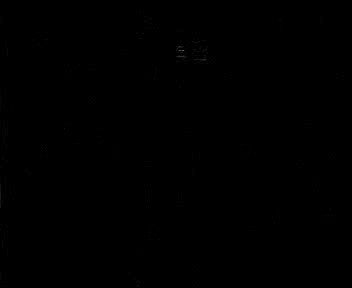

Frame 63 - Object movement detected


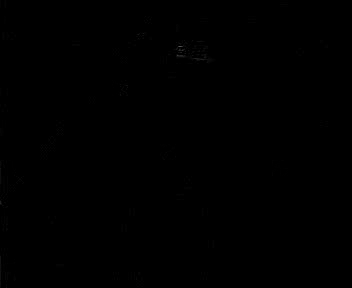

Frame 64 - No object movement detected


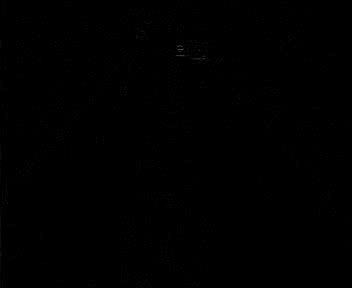

Frame 65 - Object movement detected


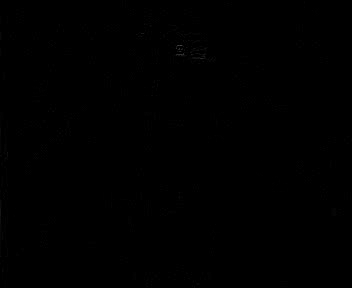

Frame 66 - Object movement detected


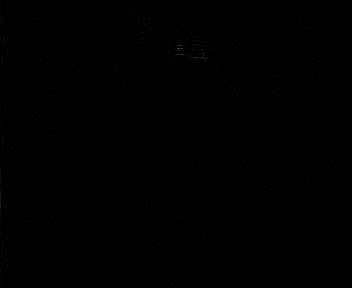

Frame 67 - No object movement detected


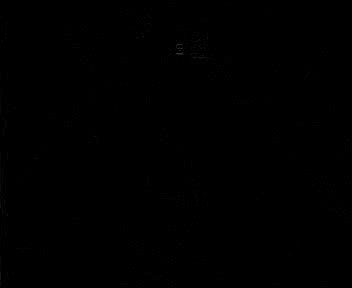

Frame 68 - No object movement detected


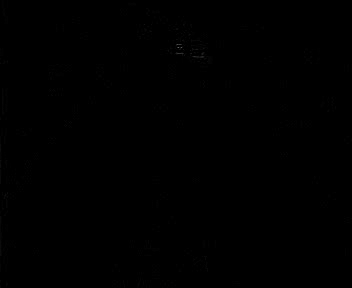

Frame 69 - No object movement detected


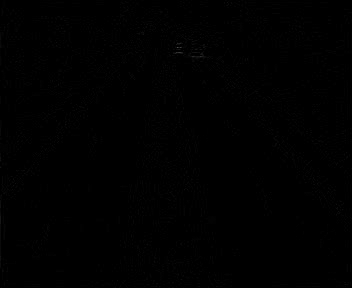

Frame 70 - No object movement detected


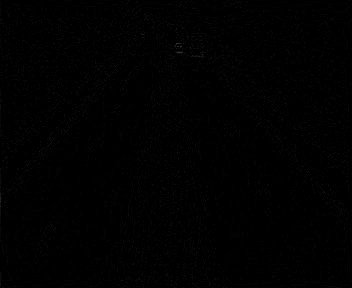

Frame 71 - No object movement detected


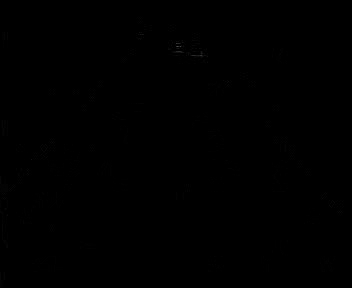

Frame 72 - No object movement detected


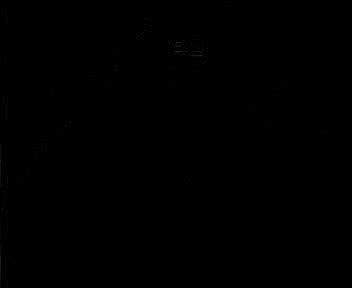

Frame 73 - No object movement detected


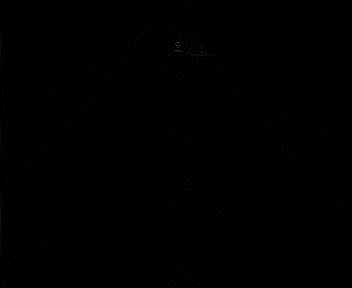

Frame 74 - No object movement detected


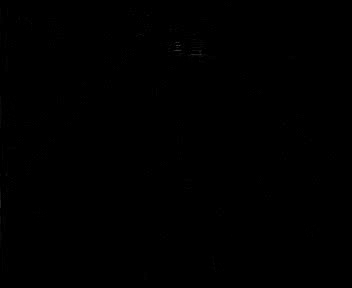

Frame 75 - No object movement detected


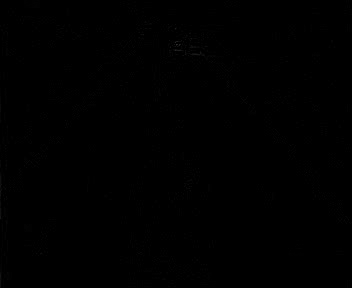

Frame 76 - No object movement detected


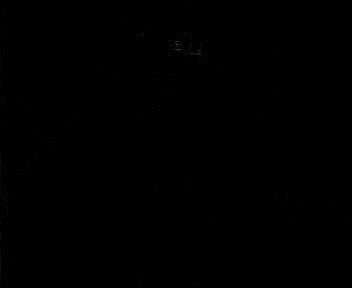

Frame 77 - No object movement detected


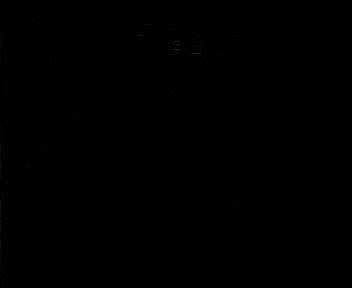

Frame 78 - No object movement detected


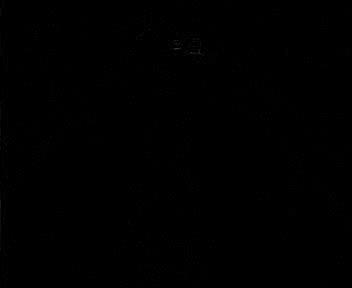

Frame 79 - No object movement detected


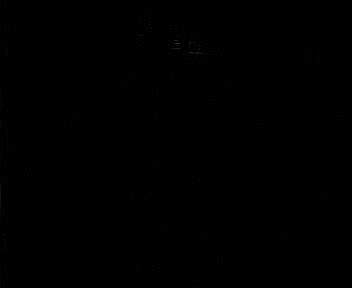

Frame 80 - No object movement detected


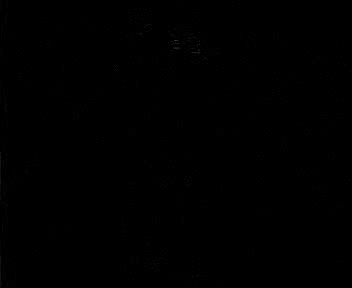

Frame 81 - No object movement detected


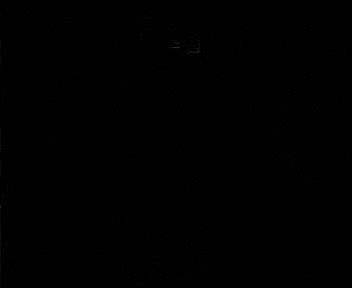

Frame 82 - No object movement detected


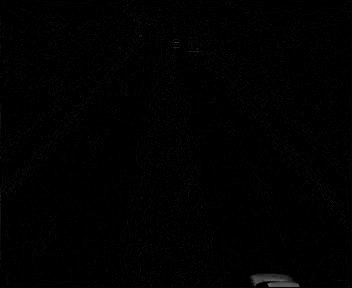

Frame 83 - No object movement detected


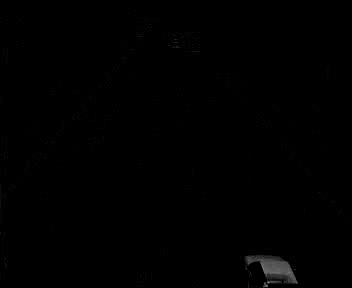

Frame 84 - Object movement detected


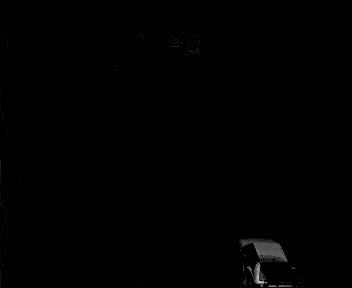

Frame 85 - Object movement detected


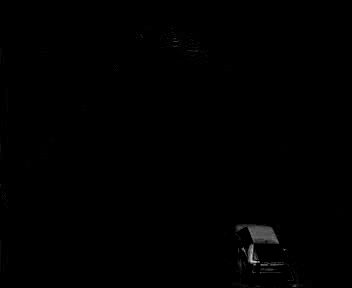

Frame 86 - Object movement detected


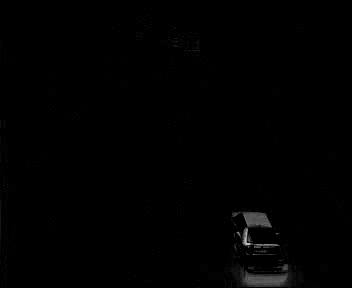

Frame 87 - Object movement detected


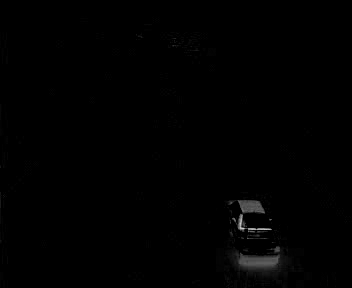

Frame 88 - Object movement detected


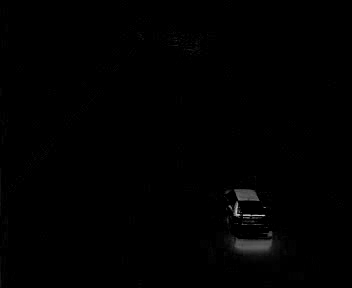

Frame 89 - Object movement detected


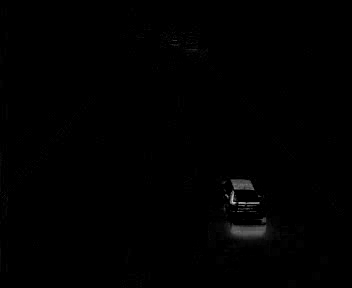

Frame 90 - Object movement detected


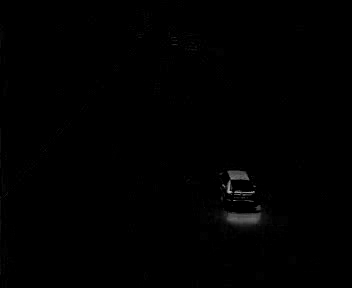

Frame 91 - Object movement detected


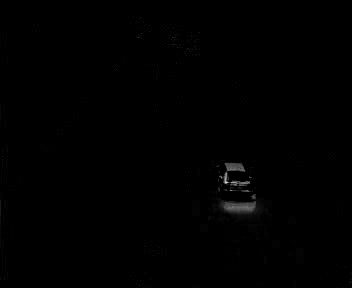

Frame 92 - Object movement detected


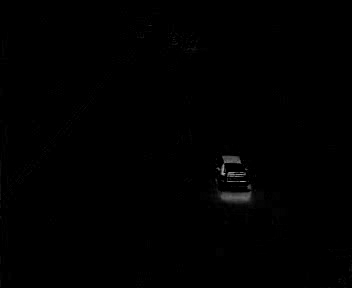

Frame 93 - Object movement detected


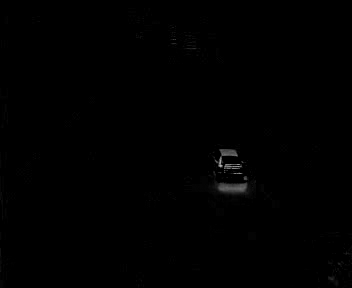

Frame 94 - Object movement detected


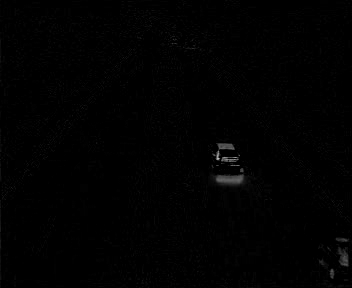

Frame 95 - Object movement detected


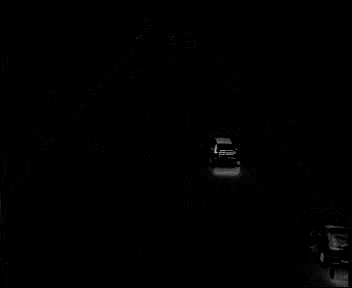

Frame 96 - Object movement detected


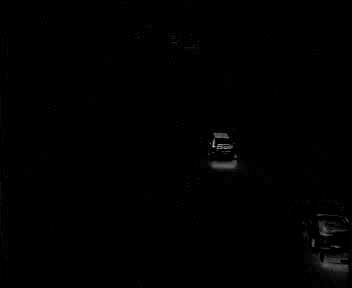

Frame 97 - Object movement detected


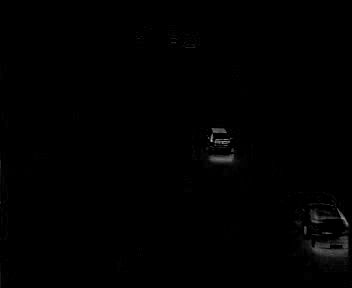

Frame 98 - Object movement detected


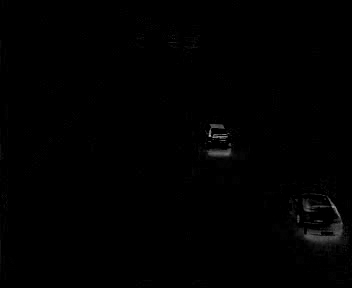

Frame 99 - Object movement detected


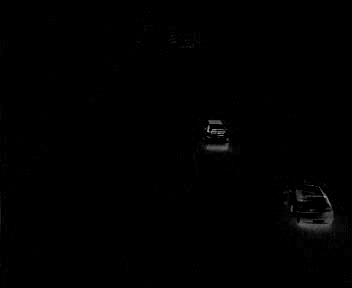

Frame 100 - Object movement detected


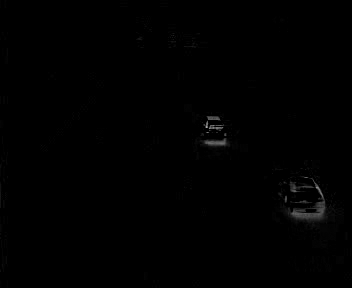

Frame 101 - Object movement detected


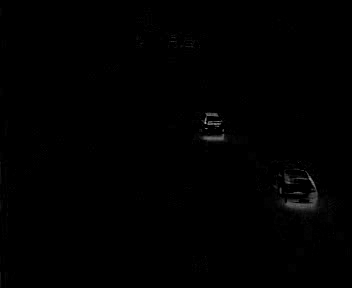

Frame 102 - Object movement detected


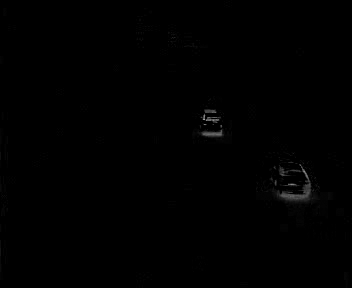

Frame 103 - Object movement detected


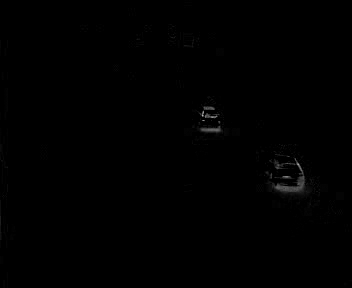

Frame 104 - Object movement detected


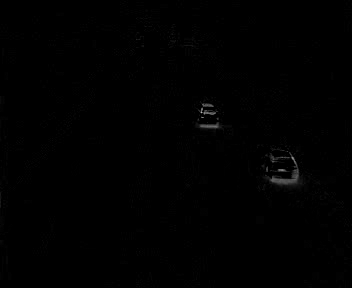

Frame 105 - Object movement detected


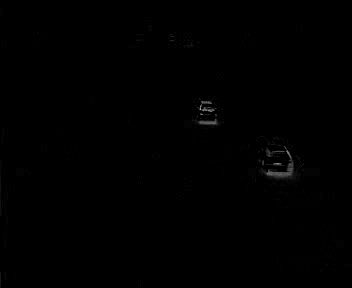

Frame 106 - Object movement detected


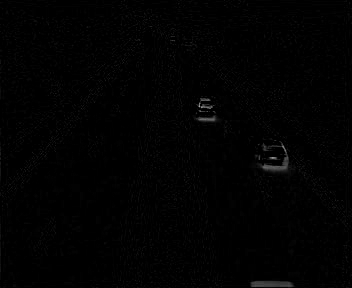

Frame 107 - Object movement detected


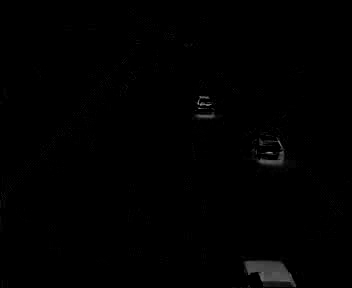

Frame 108 - Object movement detected


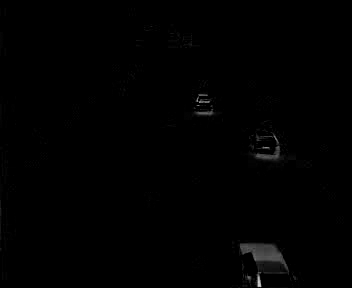

Frame 109 - Object movement detected


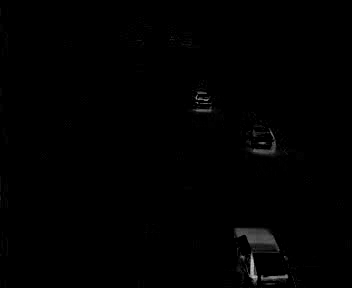

Frame 110 - Object movement detected


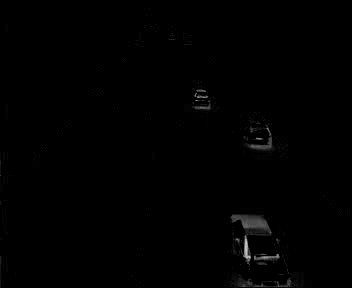

Frame 111 - Object movement detected


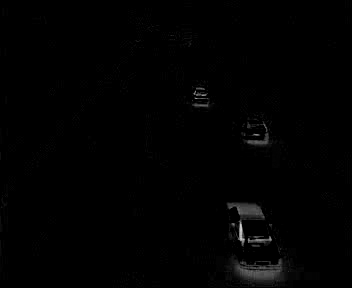

Frame 112 - Object movement detected


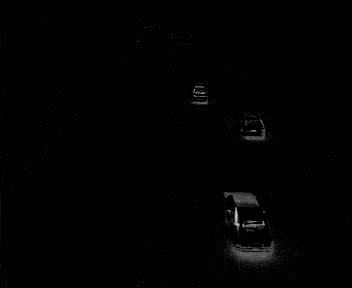

Frame 113 - Object movement detected


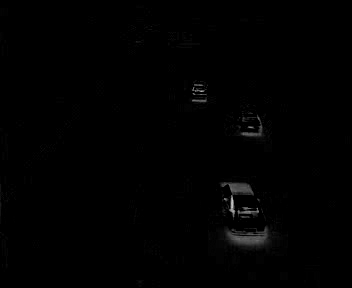

Frame 114 - Object movement detected


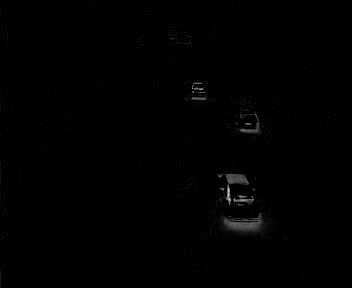

Frame 115 - Object movement detected


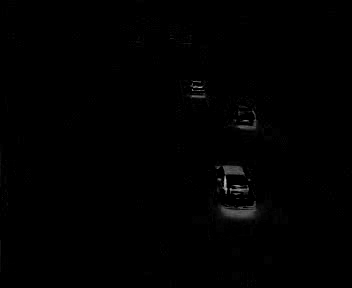

Frame 116 - Object movement detected


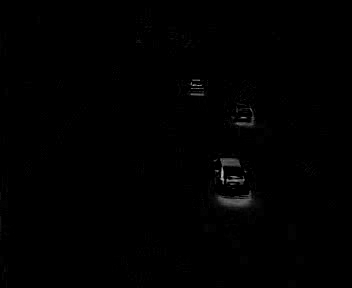

Frame 117 - Object movement detected


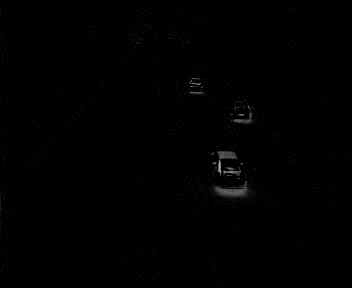

Frame 118 - Object movement detected


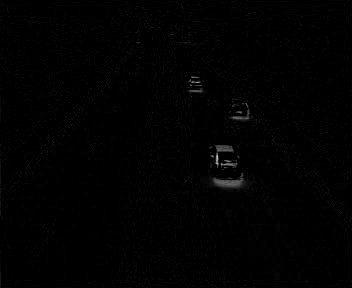

Frame 119 - Object movement detected


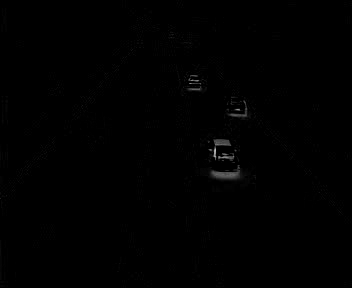

Frame 120 - Object movement detected


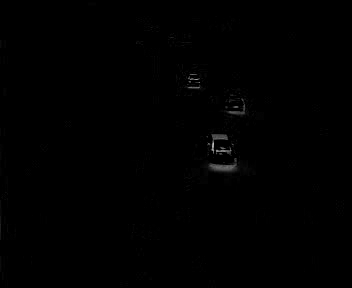

Frame 121 - Object movement detected


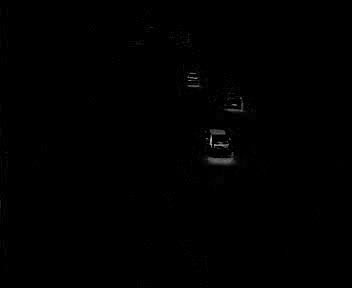

Frame 122 - Object movement detected


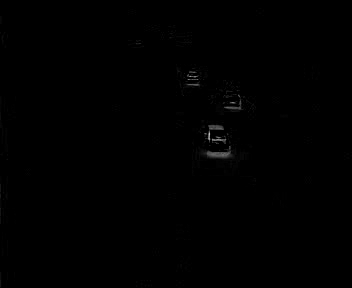

Frame 123 - Object movement detected


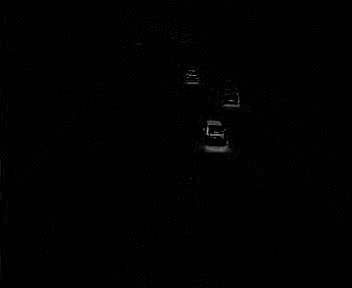

Frame 124 - Object movement detected


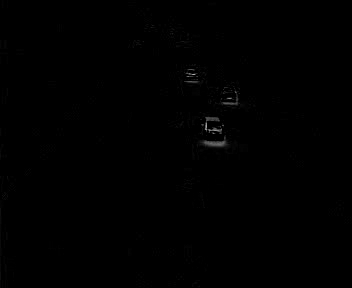

Frame 125 - Object movement detected


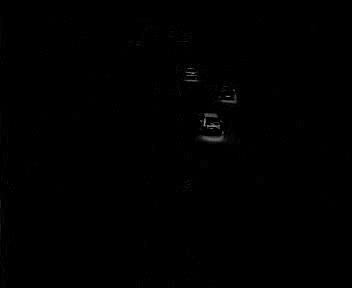

Frame 126 - Object movement detected


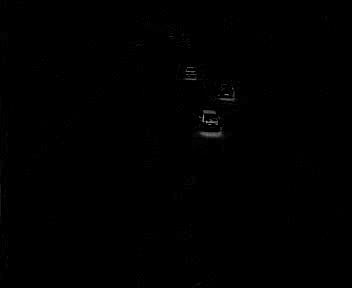

Frame 127 - Object movement detected


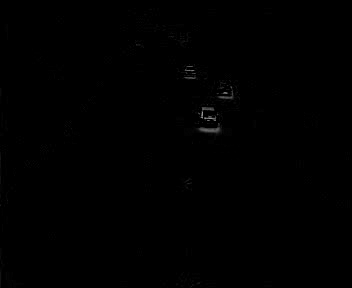

Frame 128 - Object movement detected


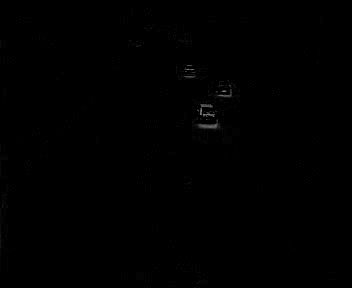

Frame 129 - Object movement detected


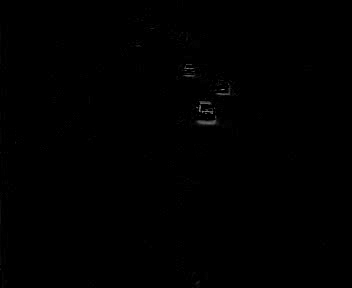

Frame 130 - Object movement detected


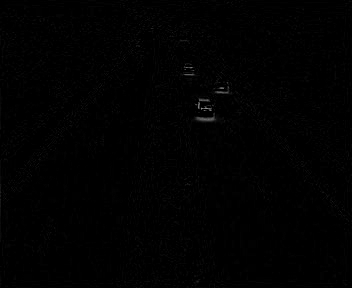

Frame 131 - Object movement detected


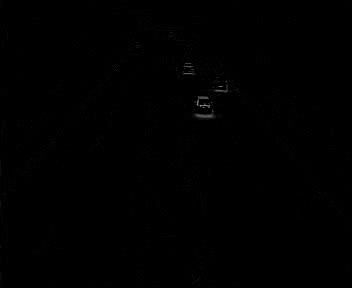

Frame 132 - Object movement detected


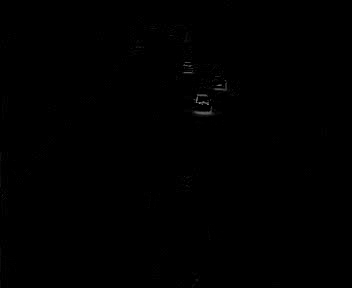

Frame 133 - Object movement detected


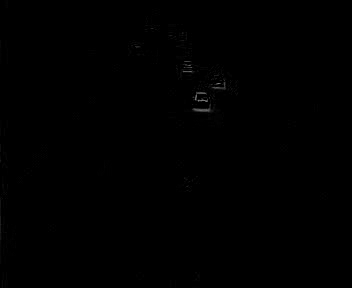

Frame 134 - Object movement detected


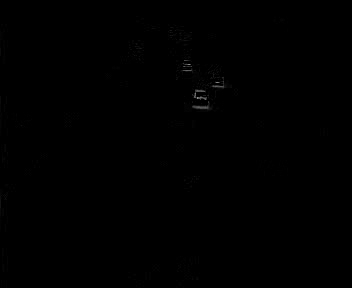

Frame 135 - Object movement detected


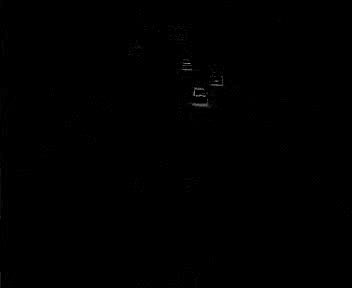

Frame 136 - Object movement detected


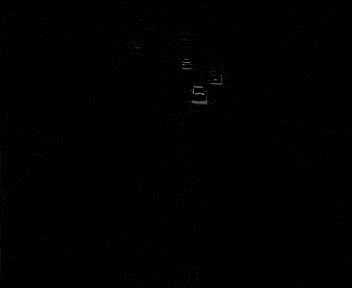

Frame 137 - Object movement detected


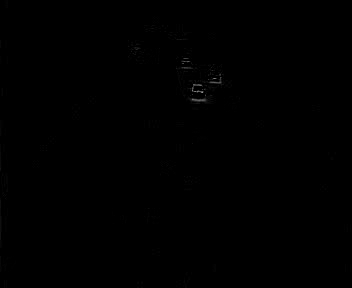

Frame 138 - Object movement detected


In [ ]:
frames = []
frameDifferences = []
differenceValues = []
frameIndex = []
classification = []
currentFrame = 0
nextFrame = 1
threshold = -100

vid = cv2.VideoCapture('DatasetC.mpg')
success = True

while success:
  success, img = vid.read()
  if success:
    img = img[:,:,::-1]
    img = np.dot(img[...,:3], [0.3, 0.59, 0.11]) 
    frames.append(img)

while nextFrame < len(frames):
  diff = ICV_imgDifference2(frames[currentFrame], frames[nextFrame])
  frameDifferences.append(diff)

  cv2_imshow(diff)
  
  diffVal = (min(diff.flatten()) - min(frames[currentFrame].flatten()))
  differenceValues.append(diffVal)

  if diffVal < threshold:
    print("Frame %d - Object movement detected" % currentFrame)
    classification.append(1)
  else:
    print("Frame %d - No object movement detected" % currentFrame)
    classification.append(0)

  frameIndex.append(currentFrame)

  currentFrame += 1
  nextFrame += 1

In [ ]:
#with my classification method, we're able to pick up when there are no cars/objects on the road

#### C) Write a function that generates a reference frame (background) for the sequence using for example frame differencing and a weighted temporal averaging algorithm.

In [ ]:
len(frames)

140

In [ ]:
#get the average across all frames in the image, giving the frames where no image is detected a higher weighting?
#putting the data ii have into a dictionary
data = {
    "frame" : frameIndex,
    "frameImg" : frames[1:],
    "differenceImg" : frameDifferences,
    "movementDetection" : classification,
}

imageData = pd.DataFrame(data)
imageData

,frame,frameImg,differenceImg,movementDetection
0,0,"[[19.630000000000003, 19.630000000000003, 22.6...","[[-1.3999999999999986, -1.3999999999999986, 0....",1
1,1,"[[15.629999999999999, 18.63, 21.63, 22.63, 22....","[[-4.0000000000000036, -1.0000000000000036, -1...",1
2,2,"[[15.629999999999999, 18.63, 19.63000000000000...","[[0.0, 0.0, -1.9999999999999964, -2.9999999999...",1
3,3,"[[18.63, 21.63, 22.63, 21.63, 21.63, 22.63, 25...","[[3.0, 3.0, 2.9999999999999964, 1.999999999999...",1
4,4,"[[21.03, 21.03, 19.03, 19.03, 22.0299999999999...","[[2.400000000000002, -0.5999999999999979, -3.5...",1
...,...,...,...,...
134,134,"[[16.349999999999998, 17.349999999999998, 18.3...","[[-5.0, -4.0, -2.9999999999999964, -1.0, 1.0, ...",1
135,135,"[[16.349999999999998, 17.349999999999998, 18.3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
136,136,"[[21.349999999999998, 21.349999999999998, 21.3...","[[5.0, 4.0, 2.9999999999999964, 1.0, -1.0, -2....",1
137,137,"[[21.349999999999998, 21.349999999999998, 21.3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1


In [ ]:
#weighting based on whether frame has image detected
weights = []
for i in imageData["movementDetection"]:
  if i == 1:
    weights.append(1)
  else:
    weights.append(2)

imageData['weight'] = weights

imageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   frame              139 non-null    int64 
 1   frameImg           139 non-null    object
 2   differenceImg      139 non-null    object
 3   movementDetection  139 non-null    int64 
 4   weight             139 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 5.6+ KB


In [ ]:
framesArray = np.array(frames)
framesArray.shape

(140, 288, 352)

In [ ]:
framesArray[1:].shape

(139, 288, 352)

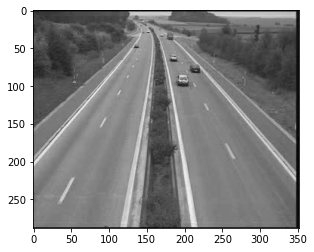

In [ ]:
for i in range(len(framesArray[1:])):
  aa = np.multiply(framesArray[i], weights[i]) / len(weights)

plt.imshow(aa, cmap='gray')

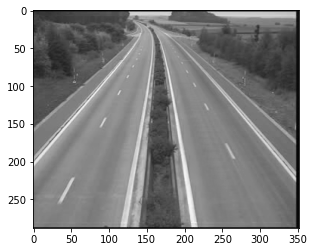

In [ ]:
meanImage = np.mean(framesArray, axis=0)
plt.imshow(meanImage,cmap='gray')

In [ ]:
def ICV_backgroundFrame(arrayOfFrames):
  for i in range(len(arrayOfFrames[1:])):
    x = (np.multiply(arrayOfFrames[i], weights[i])) / len(weights)
    #x = np.mean(np.multiply(framesArray[i], weights[i]), axis=0)
  
  return x

In [ ]:
background = ICV_backgroundFrame(framesArray[1:])
background.shape

(288, 352)

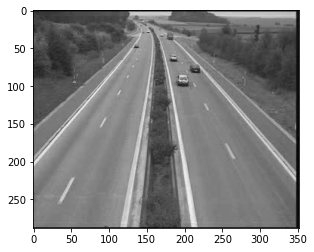

In [ ]:
plt.imshow(background, cmap = 'gray')

####D) Write a function that counts the number of moving objects in each frame of a sequence. Generate a bar plot that visualizes the number of objects for each frame of the whole sequence. Discuss in the report the implemented solution, including advantages and disadvantages.

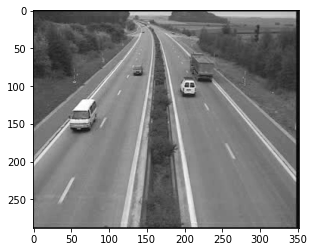

In [ ]:
frame = frames[20]
plt.imshow(frame, cmap='gray')

In [ ]:
diffFrame = abs(frame) - abs(background)

In [ ]:
diffFrame

array([[ 1.38664029e+01,  1.58664029e+01,  1.78664029e+01, ...,
         2.38345324e+01,  1.95572662e+01,  7.55007194e+00],
       [ 1.88448201e+01,  2.08520144e+01,  2.28448201e+01, ...,
         1.28633094e+01,  1.75356835e+01,  1.85284892e+01],
       [ 5.26089928e+01,  5.36161871e+01,  5.56305755e+01, ...,
         2.12460432e+01,  7.96877698e+00,  1.09687770e+01],
       ...,
       [ 9.79546763e+01,  1.29911511e+02,  1.31871655e+02, ...,
         1.47016547e+01,  1.13588489e+01,  1.73228777e+01],
       [ 8.90122302e+01,  1.19969065e+02,  1.20929209e+02, ...,
         1.76800719e+01,  1.23444604e+01,  1.53444604e+01],
       [-7.51798561e-02,  1.17316547e+01,  1.26989928e+01, ...,
         9.78079137e+00,  9.38043165e+00,  5.36604317e+00]])

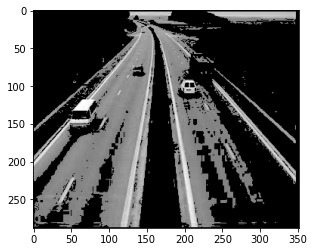

In [ ]:
mask = diffFrame > 128
maskImage = diffFrame * mask
plt.imshow(maskImage, cmap='gray')

In [ ]:
im = measure.label(maskImage, background = 0)
a = measure.regionprops(im)
num = 0
for p in a:
  if p.euler_number == -1:
    num += 1

In [ ]:
num

2

In [ ]:
framesArray

objectsPerFrame = []

for frame in framesArray:
  #calculate image difference
  diff = abs(frame) - abs(background)

  #creating the mask
  mask = diff > 128
  maskImage = diff * mask

  #calculating the lables
  lables = measure.label(maskImage, background = 0)
  regionProps = measure.regionprops(lables)
  objectCount = 0
  for p in regionProps:
    if p.euler_number == -1:
      objectCount += 1
      
  objectsPerFrame.append(objectCount)

In [ ]:
#creating a function
def ICV_countObjects(framesArray):
  #get the background grom the sequence:
  background = ICV_backgroundFrame(framesArray)
  
  #list to store the count of objects per frame
  objectsPerFrame = []

  for frame in framesArray:
    #calculate image difference
    diff = abs(frame) - abs(background)

    #creating the mask
    mask = diff > 128
    maskImage = diff * mask

    #calculating the lables
    lables = measure.label(maskImage, background = 0)
    regionProps = measure.regionprops(lables)
    objectCount = 0
    for p in regionProps:
      if p.euler_number == -1:
        objectCount += 1

    objectsPerFrame.append(objectCount)
  return(objectsPerFrame)

In [ ]:
videoObjects = ICV_countObjects(frames)
len(videoObjects)

140

<BarContainer object of 140 artists>

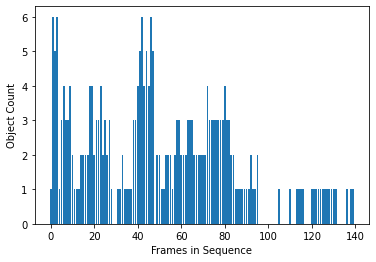

In [ ]:
#plotting the bar graph
plt.xlabel("Frames in Sequence")
plt.ylabel("Object Count")
x = list(range(len(videoObjects)))
plt.bar(x,videoObjects)